<h1><center>Laboratorio 4: ¿Superhéroe o Villano? 🦸</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Jonathan Espínola
- Nombre de alumno 2: Tomás Valencia


### **Link de repositorio de GitHub:** `https://github.com/Johnny952/labDataScience`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Clasificación con texto.
- Clasificación en `scikit-learn`.
- Modelos a través del uso de `pipeline`.
- Optimización de modelos usando `GridSearchCV`.

## Reglas:

- Fecha de entrega: 4/06/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar las ventajas que nos ofrece crear un pipeline.
- Obtener caracteristicas desde texto.
- Crear modelos de clasificación de texto.
- Optimizar la clasificación de texto usando wordclouds.
- Usar herramientas de visualización de texto como las wordclouds.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [1]:
# Librería Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# pip install imbalanced-learn

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# Librería para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Proyecciones en baja dimensionalidad: UMAP
!pip install umap-learn

# Librería para NLP
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

Requirement already up-to-date: plotly in c:\users\jonathan\anaconda3\lib\site-packages (4.14.3)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# 1. ¿Quien es Bat Cow?

<p align="center">
  <img src="https://static.wikia.nocookie.net/p__/images/a/a2/Bat-Cow.jpg/revision/latest?cb=20180108185037&path-prefix=protagonist" width="350">
</p>

En vez de estar oprotunamente desarrollando las tareas y las evaluaciones correspondientes al curso, su profesor de catedra y su auxiliar discuten acerca la alineación del personaje de ficción *Bat-Cow*. 

El cuerpo docente, no logra ponerse de acuerdo acerca de la alineación del personaje, es decir, si lucha junto a las fuerzas del bien, si neutral a cualquier eventualidad o derechamente es un villano.
El auxiliar plantea (de forma superficial) que *Bat-cow* posee una siniestra mirada, común característica de los personajes malvados. 
Por otra parte, extendiendo las ideas de Rousseau, el profesor (*se cree filósofo... y*) plantea que tal como los humanos no nacen malos, no existe motivo por el cual un rumiante humanizado con superpoderes deba serlo.

Sin embargo, ambos concuerdan en es difícil estimar la alineación solo usando los atributos físicos, por lo que creen el análisis debe ser complementado aún más antes de comunicarle los resultados a su estudiantado. Buscando más información, ambos sujetos se percatan de la existencia de un excelente antecedente para estimar la alineación: la historia personal de cada superhéroe o villano.

Es por esto le solicitan que construya y optimice un clasificador basado en texto el cual analice la alineación de cada personaje basado en su historia personal.

Para este laboratorio deben trabajar con los datos `df_comics.csv` y `comics_no_label.csv` subidos a u-cursos. El primero es un conjunto de datos que les servirá para entrenar un modelo de clasificación, mientras que el segundo es un dataset con personajes de ficción no etiquetados a predecir (sí, aquí está la misteriosa Batcow).

Para iniciar este laboratorio, cargue los dataset señalados y visualice a través de la función `head` los atributos que poseen cada uno de los dataset.


In [4]:
# Usar solamente si utilizan Collab.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    dir = '//content//drive//My Drive//CuerpoDocente//Laboratorios//Lab4//'
except ModuleNotFoundError:
    dir = ''

In [5]:
df_comics = pd.read_csv(dir+'df_comics.csv')
df_comics_no_label = pd.read_csv(dir+'comics_no_label.csv')

## 1.1 Obtención de Features [2 puntos]

<p align="center">
  <img src="https://media0.giphy.com/media/eIUpSyzwGp0YhAMTKr/200.gif" width="300">
</p>

Su primera tarea consiste en generar un vector de características para el atributo `history_text`. En este atributo se presenta una breve descripción de la historia de cada uno de los personajes de ficción presentes en el dataset (si un personaje tiene este atributo nulo, elimínelo). Luego, para obtener características de texto aplique el modelo de conteo `bag of words` de la siguiente forma:

- Utilice `CountVectorized` junto al tokenizador (que le proveemos) `LemmaTokenizer`.
- Obtenga caracteristicas de los 1-gramas y 2-gramas del texto (ver clase).
- Fijar un maximo de 10.000 caracteristicas para el vector de salida.

Finalmente, aplique `MinMaxScaler()` sobre `atributos_de_interes` y concatene el valor obtenido con el matriz de caracteristicas obtenidas con bag of words.

```python
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
```

No es necesario que obtenga un dataframe en concreto con las características solicitadas. Se le recomienda generar un `ColumnTransformer()` para aplicar las transformaciones solicitadas en un pipeline.

**To-Do:**
- [ ] Obtener a traves de bag of words caracteristicas del resumen de historia de cada personaje.
- [ ] Aplicar MinMaxScaler sobre los atributos de interes.

In [6]:
stop_words = stopwords.words('english')

class LemmaTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

In [7]:
#### Código aquí ####
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']

df_comics = df_comics[df_comics['history_text'].notna()]


ct = ColumnTransformer(
    [
        ("vector", CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1, 2), max_features=10000), "history_text"),
        ("minmax", MinMaxScaler(), atributos_de_interes)
    ]
)

## 1.2 Diseño de Pipeline y  Primer Entrenamiento [1.5 puntos]


<p align="center">
  <img src="https://pa1.narvii.com/6374/9eaec1b7bf9157334151452a669516f9a78b954c_hq.gif" width="300">
</p>


A continuación, genere un Pipeline con las caracteristicas solicitadas en la sección 1.1, añadiendo un reductor de dimensionalidad llamado `TruncatedSVD()` ajustando el número de componentes en 1000 (este reducto de dimensionalidad es similar al PCA pero funciona para vectores dispersos) y un clasificador `MultinomialNB()` por defecto.  Luego, separe el conjunto de datos en un conjunto de entrenamiento y prueba, donde el etiquetado vendrá dado por el atributo `alignment`. Finalmente entrene el modelo y reporte el desempeño con un `classification_report`. ¿ Nos recomendaría predecir la alineación de BatCow con este clasificador?.

**Nota:** Debido al desbalance que existe entre las clases, puede ser util aplicar método de [`imbalanced-learn`](https://github.com/scikit-learn-contrib/imbalanced-learn) como RandomOverSampler sobre los datos de entrenamiento. 

**To-DO:**
- [ ] Realizar un pipeline con las caracteristicas solicitadas en 1.1,aplicar un reductor de dimensionalidad `TruncatedSVD` y aplicar un clasificador  `MultinomialNB()`.
- [ ] Entrenar el pipeline.
- [ ] (Opcional - **0.5 bonus**) Utilizar técnicas de Sampling para balancear los datos de entrenamiento.


In [15]:
#### Código aquí ####
pipe = Pipeline(
    [
        ('ct', ct),
        #('tsvd', TruncatedSVD(n_components=1000)),
        ('multi', MultinomialNB())
    ]
)

X = df_comics.drop(columns=['alignment'])
y = df_comics['alignment']
print("Splitting")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

# Necesario por si existen celdas vacias.
int_columns = ['history_text','intelligence_score',	'strength_score',	'speed_score',	
               'durability_score',	'power_score',	'combat_score']

X_train = X_train[int_columns] 
over = RandomOverSampler(random_state=42)
print("Oversampling")
X_train, y_train = over.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=int_columns)

X_test = X_test[int_columns] 

print("Training Pipeline")
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

Splitting
Oversampling
Training Pipeline
              precision    recall  f1-score   support

         Bad       0.56      0.54      0.55       142
        Good       0.69      0.71      0.70       246
     Neutral       0.17      0.16      0.17        37

    accuracy                           0.61       425
   macro avg       0.47      0.47      0.47       425
weighted avg       0.60      0.61      0.61       425



## 1.3 Entrenamiento con Grid Search [2 Puntos]

<p align="center">
  <img src="https://media1.tenor.com/images/70fdfeea52a8e2e4505498c230a0d2f9/tenor.gif?itemid=5134219" width="250">
</p>

No conformes con el rendimiento obtenido en la sección 1.2, el cuerpo docente les pide que realicen una búsqueda de grilla de los mejores hiperparámetros utilizando `GridSearchCV`. 

Para esto, se le solicita que defina al menos 3 configuraciones de hiperparámetros e intente obtener mejores resultados que los obtenidos en la sección anterior. 

A continuación, un ejemplo de parametros para GridSearch:

```python
params = [
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator1.
  # en este caso se entrenará el clasificador 1 con combinaciones de todos los 
  # parámetros de bow__max_features, bow__ngram_range, clf__n_estimators 
  # y se seleccionará la mejor combinación.
  {
  'bow__max_features': [5000, 10000, ...],
  'bow__ngram_range': [(1, 1), (1, 2), (1,3)],
  ...,
  'clf': [classificator1()],
  'clf__n_estimators': [200]
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator2:
  {'clf': [classificator2()],
   'clf__penalty': ['ovr'],
   'clf__multi_class': ['liblinear']
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator3:
  {'clf': [classificator3()]
  }
             ]
```

Además, note que puede obtener todos los parámetros configurables de un pipeline invocando sobre este el método `.get_params()`.

**Nota:** El GridSearch puede tomar tiempos de búsqueda exorbitantes, por lo que se le recomienda dejar corriendo el código y tomarse un tecito.

In [18]:
#### Código aquí ####
params = [
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator1.
  # en este caso se entrenará el clasificador 1 con combinaciones de todos los 
  # parámetros de bow__max_features, bow__ngram_range, clf__n_estimators 
  # y se seleccionará la mejor combinación.
  {
  'ct__vector__max_features': [5000],
  'ct__vector__ngram_range': [(1, 1)],
  'multi': [RandomForestClassifier()],
  'multi__n_estimators': [200]
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator2:
  {'multi': [LogisticRegression()],
   'multi__penalty': ['l2'],
   'multi__multi_class': ['multinomial']
  },
  # esta es la configuración de una busqueda en particular
  # con el clasificador classificator3:
  {'multi': [DecisionTreeClassifier()]
  }
  ]


grid = GridSearchCV(pipe, params)
grid.fit(X_res, y_res)


C:\Users\jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('vector',
                                                                         CountVectorizer(max_features=10000,
                                                                                         ngram_range=(1,
                                                                                                      2),
                                                                                         tokenizer=<__main__.LemmaTokenizer object at 0x000002B43B4AEF40>),
                                                                         'history_text'),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['intelligence_score',
                                     

In [21]:
grid.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('vector',
                                                  CountVectorizer(max_features=5000,
                                                                  tokenizer=<__main__.LemmaTokenizer object at 0x000002B43F3B1340>),
                                                  'history_text'),
                                                 ('minmax', MinMaxScaler(),
                                                  ['intelligence_score',
                                                   'strength_score',
                                                   'speed_score',
                                                   'durability_score',
                                                   'power_score',
                                                   'combat_score'])])),
                ('multi', RandomForestClassifier(n_estimators=200))])

<p align="center">
  <img src="http://pobla.es/BLOG/BlackFriday_CyberMonday_2018/steewea---can-t-wait-soon.gif">
</p>

#### 1.3.1 Mejor configuración [0.5]

Comente cual fue la mejor configuración obtenida por Grid Search y por qué cree que esta fue la mejor.

```
La mejor configuración fue Random Forest, porque se tiene una gran cantidad de datos y esta tiene la mayor capacidad, además que no se 
hizo una búsqueda intensiva de los hiperparámetros, por lo que la regresión logística no logró sus mejores resultados.
```

## 1.4 Predicción del datos sin etiquetado

<p align="center">
  <img src="https://pbs.twimg.com/media/DolotxUUYAAbg7f.jpg" width="350">
</p>


Llego el momento de predecir cual es la verdadera alineación de `Batcow`. Para esto, deben escoger el mejor pipeline obtenido en las secciones anteriores y predecir la alineación de todos los datos presentes en `df_comics_no_label`.Luego, anexen las alineaciones obtenidas a su correspondiente columna  del dataframe original (atributo `alignment`) y busquen a los flamantes personajes `Batcow`, `Vergil`, y `Gorilla Girl'. Presente los resultados en un `Dataframe`.

**Nota:** Recuerde que pueden existir campos vacios en `history_text`, por lo que se les recomienda borrar los nan.

In [ ]:
#### Código aquí ####
df_comics_no_label = df_comics_no_label[df_comics_no_label['history_text'].notna()]

labels = grid.predict(df_comics_no_label)
df_comics_no_label['alignment'] = labels


print(df_comics_no_label[df_comics_no_label['name'].isin(['Batcow', 'Vergil', 'Gorilla Girl'])])


### Wordclouds [Opcional- 0,5] 

Una buena pero informal forma de comunicar los resultados del trabajo con texto es generar Wordclouds. Este tipo de visualizaciones nos informan de forma gráfica cuales son las palabras más frecuentes según el tamaño de estas al ser posicionadas en un lienzo.
<center>
<img alt='Ejemplo de una Wordcloud de Starwars' src='https://amueller.github.io/word_cloud/_images/sphx_glr_a_new_hope_001.png' width=400/>

Ejemplo de una Wordcloud de Starwars

</center>
Dicho esto, como equipo docente nos encantaría conocer cuales son las palabras que caracterizan tanto a heroes como neutrales y a villanos y cuales son sus principales diferencias. Por esta razón, les pedimos como última tarea generar una wordcloud con las historias de cada personaje según cada alineamiento (clase). Pueden ocupar el dataset completo para esto. 


**Nota:** Recuerde eliminar las stopwords. Guías completas para generar las wordclouds, eliminar las stopwords y configurar los parámetros de las nubes creadas pueden ser encontradas en su [documentación oficial](https://amueller.github.io/word_cloud/) y en [datacamp](https://www.datacamp.com/community/tutorials/wordcloud-python).





In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [36]:
def stop_stem(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

    ps = PorterStemmer()
    return " ".join([ps.stem(word) for word in filtered_sentence])

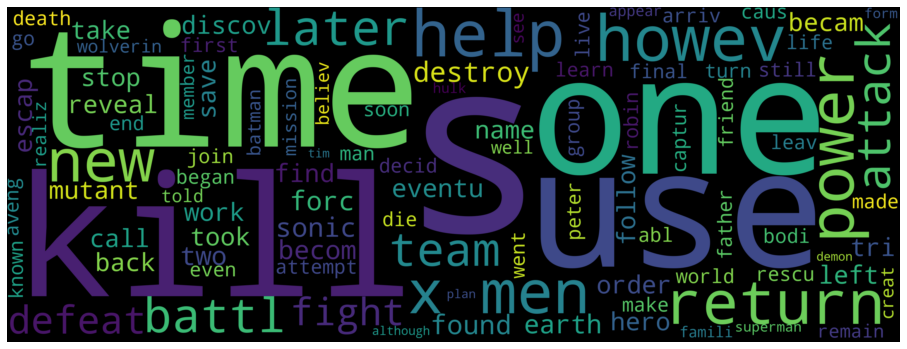

In [37]:
#### Wordcloud para heroes ####
text = " ".join(df_comics[df_comics['alignment'] == 'Good']["history_text"].tolist())
text = stop_stem(text)

plt.rcParams["figure.figsize"] = [16, 9]

wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

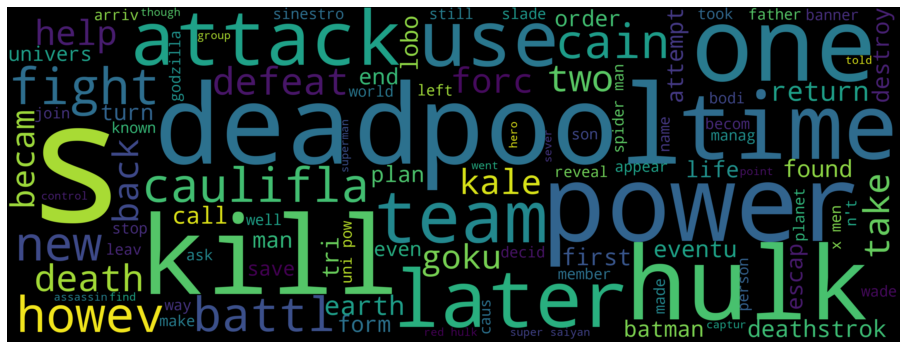

In [38]:
#### Wordcloud para neutrales ####
text = " ".join(df_comics[df_comics['alignment'] == 'Neutral']["history_text"].tolist())
text = stop_stem(text)

plt.rcParams["figure.figsize"] = [16, 9]

wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

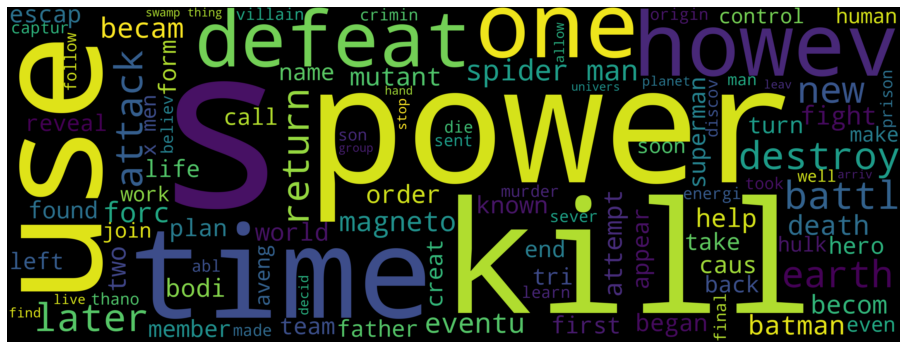

In [39]:
#### Wordcloud para villanos ####
text = " ".join(df_comics[df_comics['alignment'] == 'Bad']["history_text"].tolist())
text = stop_stem(text)

plt.rcParams["figure.figsize"] = [16, 9]

wordcloud = WordCloud(scale=2, width=1600, height=600, max_words=100).generate(
    text,
)

plt.imshow(
    wordcloud,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

Comente las principales diferencias entre las tres wordclouds.
¿Hay palabras que caracterizen a los grupos y que no aparezcan en los otros?

En general son bien parecidas las tres wordclouds, pero se aprecian que están algunos superhéroes o villanos en algunas de ellas y que no aparecen en otras, como deadpool en neutral o magneto en los malos.

Una cosa curiosa es la cantidad de veces que aparece ```power``` en las tres wordclouds, donde en los buenos aparece en menor cantidad proporcionalmente, y en los malos en mayor cantidad. Lo mismo pasa para algunas otras palabras como ```kill``` o ```time```, en que se repite en todas, pero en distintas proporciones.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab, solo para tareas**. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>

<p align="center">
  <img src="https://memecrunch.com/meme/BMFZD/bye-bye/image.gif?w=400&c=1">
</p>